# Condition number

Copyright (C) 2020 Andreas Kloeckner

<details>
<summary>MIT License</summary>
Permission is hereby granted, free of charge, to any person obtaining a copy
of this software and associated documentation files (the "Software"), to deal
in the Software without restriction, including without limitation the rights
to use, copy, modify, merge, publish, distribute, sublicense, and/or sell
copies of the Software, and to permit persons to whom the Software is
furnished to do so, subject to the following conditions:

The above copyright notice and this permission notice shall be included in
all copies or substantial portions of the Software.

THE SOFTWARE IS PROVIDED "AS IS", WITHOUT WARRANTY OF ANY KIND, EXPRESS OR
IMPLIED, INCLUDING BUT NOT LIMITED TO THE WARRANTIES OF MERCHANTABILITY,
FITNESS FOR A PARTICULAR PURPOSE AND NONINFRINGEMENT. IN NO EVENT SHALL THE
AUTHORS OR COPYRIGHT HOLDERS BE LIABLE FOR ANY CLAIM, DAMAGES OR OTHER
LIABILITY, WHETHER IN AN ACTION OF CONTRACT, TORT OR OTHERWISE, ARISING FROM,
OUT OF OR IN CONNECTION WITH THE SOFTWARE OR THE USE OR OTHER DEALINGS IN
THE SOFTWARE.
</details>

In [1]:
import numpy as np
import numpy.linalg as la
import matplotlib.pyplot as pt

Let's grab a $2\times 2$ matrix $A$:

In [6]:
A = np.array([[5,0], [0,2]])
A.shape

(2, 2)

And its inverse as `Ainv`:

In [7]:
Ainv = la.inv(A)
print(Ainv)

[[0.2 0. ]
 [0.  0.5]]


Now we would like to figure out where that matrix puts all the vectors with 2-norm 1.

To do so, let's make an array of vectors with vectors with norm 1:

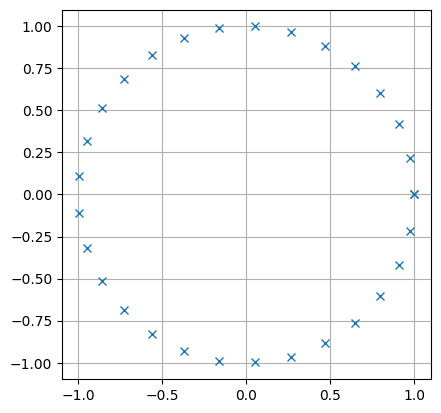

In [9]:
phi = np.linspace(0, 2*np.pi, 30)
xs = np.array([
    np.cos(phi),
    np.sin(phi)
])

pt.gca().set_aspect("equal")
pt.plot(xs[0], xs[1], "x")
pt.grid()

Now apply $A$ to all those vectors...:

In [10]:
Axs = A.dot(xs)
Axs.shape

(2, 30)

...and plot:

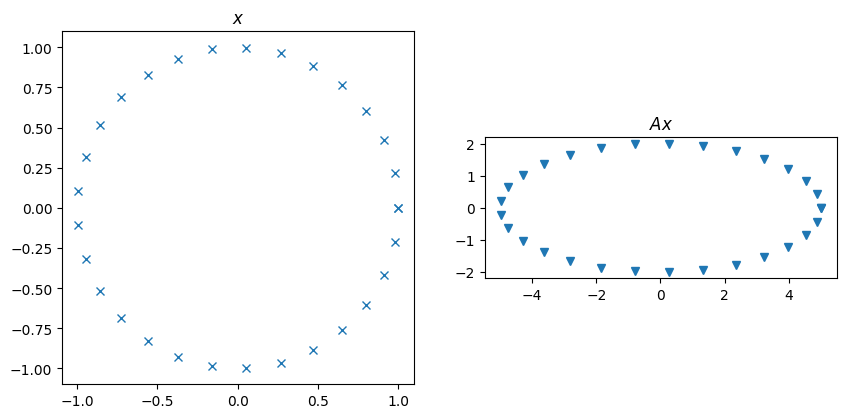

In [11]:
pt.figure(figsize=(10, 5))

pt.subplot(121)
pt.title("$x$")
pt.plot(xs[0], xs[1], "x")
pt.gca().set_aspect("equal")

pt.subplot(122)
pt.title("$Ax$")
pt.plot(Axs[0], Axs[1], "v")
pt.gca().set_aspect("equal")

-------------

Next, let's see what happens to small perturbations at each of the $x$ and $Ax$ points.

To that end, let's make an array `ys` of shape $2\times N_p\times N_p$, where $N_p$ is the number of points above.

In [12]:
# ys has axes: XY x Npoints x Npoints

perturbation_size = 0.1
ys = perturbation_size * xs.reshape(2, -1, 1) + xs.reshape(2, 1, -1)

Ays = np.tensordot(A, ys, axes=1)
Ays.shape

(2, 30, 30)

Side note: What does the argument `-1` to reshape do?

-----------------------
Let's plot what we've just made

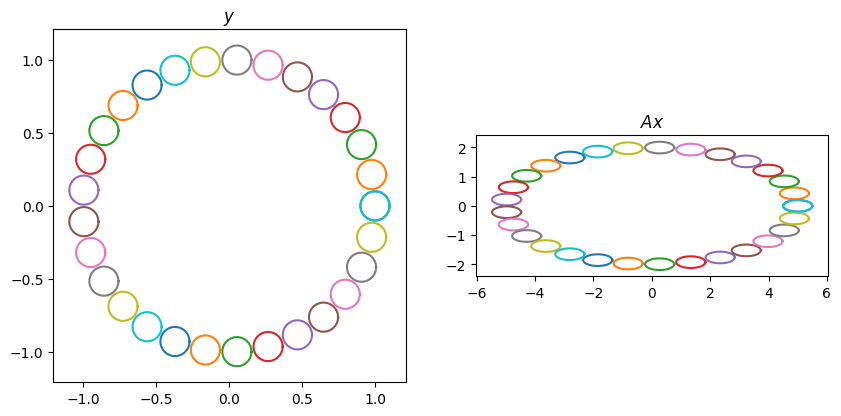

In [13]:
pt.figure(figsize=(10, 5))

pt.subplot(121)
pt.title("$y$")
pt.plot(ys[0], ys[1])
pt.gca().set_aspect("equal")

pt.subplot(122)
pt.title("$Ax$")
pt.plot(Ays[0], Ays[1])
pt.gca().set_aspect("equal")

-------------------
Let's compare this with $\|A\|$:

5.0


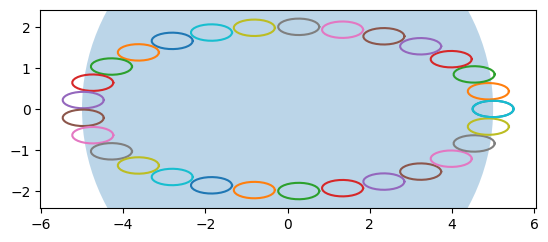

In [14]:
norm = la.norm(A, 2)
print(norm)

pt.plot(Ays[0], Ays[1])

ax = pt.gca()
ax.set_aspect("equal")
ax.add_artist(pt.Circle([0, 0], norm, alpha=0.3, lw=0))

------------------
What we want now is a circle around each of the $Ax$ that says,

"Because of the $\Delta x$ variation, $b$ is at most going to wiggle by this much,
i.e. $\Delta b$ will be at most this big."

------

Now we want a $\kappa$ with $\frac{\|\Delta b\|}{\|b\|}\le \kappa \frac{\|\Delta x\|}{\|x\|}$.

Assume $\|x\|=1$. Equivalent: $\|\Delta b\|\le \kappa \|\Delta x\|\|b\|$.

Which $\kappa$ does the job?

NameError: name 'kappa' is not defined

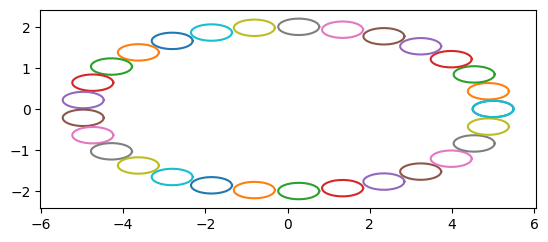

In [15]:
pt.plot(Ays[0], Ays[1])

ax = pt.gca()
ax.set_aspect("equal")
for i in range(Ays.shape[2]):
    b = Axs[:, i]
    norm_delta_y = kappa * perturbation_size * la.norm(b)
    ax.add_artist(pt.Circle(b, norm_delta_y, alpha=0.3, lw=0))